In [61]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold
from collections import Counter
from scipy.stats import pearsonr

## Load Data

In [81]:
#creates a dataframe from a file
df = pd.read_csv("Postures.csv")

#info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      78096 non-null  object 
 12  Y3      78096 non-null  object 
 13  Z3      78096 non-null  object 
 14  X4      78096 non-null  object 
 15  Y4      78096 non-null  object 
 16  Z4      78096 non-null  object 
 17  X5      78096 non-null  object 
 18  Y5      78096 non-null  object 
 19  Z5      78096 non-null  object 
 20  X6      78096 non-null  object 
 21  Y6      78096 non-null  object 
 22

In [82]:
df

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78091,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-6.54311453354464,87.7333643096221,61.2163626180662,-62.1262783028233,?,?,?,?,?,?
78092,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-62.1305625712145,78.2298473919132,33.0784071753174,-45.2495433686171,?,?,?,?,?,?
78093,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,3.83590370588782,78.591554010542,32.32773753847,-46.1665560916632,?,?,?,?,?,?
78094,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-63.2216259324485,?,?,?,?,?,?,?,?,?


### Exploratory Data Analysis (EDA)


0
Class    1.000000
Y2       0.169296
Y1       0.144135
Z2       0.095512
Z1       0.089894
Y0       0.081808
X0       0.080209
Z0       0.051832
X1      -0.010528
User    -0.030667
X2      -0.052351
Name: Class, dtype: float64


C:\Users\guilh\AppData\Local\Temp\ipykernel_31952\4226729252.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


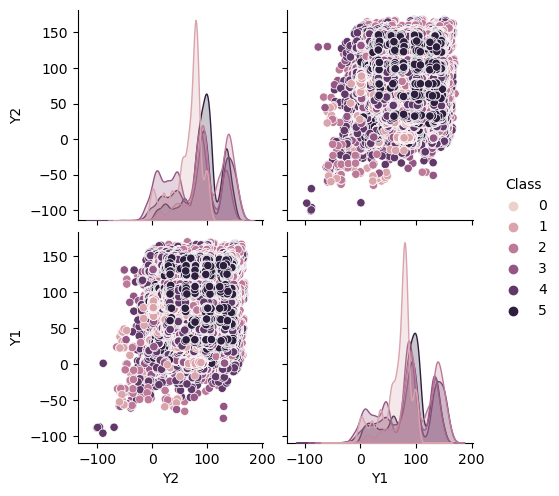

In [83]:
#check for duplicates
print(df.duplicated().sum())

#creates a matrix of correlations
corr_matrix = df.corr() 
#how much each attribute correlates with the Class target variable value, the lower the value the least relevant the feature is
print(corr_matrix['Class'].sort_values(ascending=False))

#plot to present the correlation between the 2 most correlated features with target variable
sns.pairplot(df, vars=['Y2', 'Y1'], hue='Class')

## Data processing


In [84]:
#eliminating the first row of the dataset
df = df.iloc[1:]

print(df)

#replacing the ? values with Nan values
df = df.replace({'?': np.nan})

print(df.info())



       Class  User         X0          Y0         Z0         X1          Y1  \
1          1     0  54.263880   71.466776 -64.807709  76.895635   42.462500   
2          1     0  56.527558   72.266609 -61.935252  39.135978   82.538530   
3          1     0  55.849928   72.469064 -62.562788  37.988804   82.631347   
4          1     0  55.329647   71.707275 -63.688956  36.561863   81.868749   
5          1     0  55.142401   71.435607 -64.177303  36.175818   81.556874   
...      ...   ...        ...         ...        ...        ...         ...   
78091      5    14  54.251127  129.177414 -44.252511  27.720784  107.810661   
78092      5    14  54.334883  129.253842 -44.016320  27.767911  107.914808   
78093      5    14  54.151540  129.269502 -44.173273  27.725978  108.034006   
78094      5    14  27.915311  108.007390  10.814957  -0.910435  122.464093   
78095      5    14  27.898705  108.092877  11.107857 -30.031402   77.740235   

              Z1         X2          Y2  ...       

In [85]:
#eliminating the last 3 columns 
df = df.iloc[:, :-3]

print(df)

#create dummies to change the variable user from numeric to categorical, adding a column for each user
df = pd.concat([df,pd.get_dummies(df['User'], prefix= 'user')], axis = 1)
print(df)

#eliminating the original numerical User column
df = df.drop(columns=["User"])

print(df.info())



       Class  User         X0          Y0         Z0         X1          Y1  \
1          1     0  54.263880   71.466776 -64.807709  76.895635   42.462500   
2          1     0  56.527558   72.266609 -61.935252  39.135978   82.538530   
3          1     0  55.849928   72.469064 -62.562788  37.988804   82.631347   
4          1     0  55.329647   71.707275 -63.688956  36.561863   81.868749   
5          1     0  55.142401   71.435607 -64.177303  36.175818   81.556874   
...      ...   ...        ...         ...        ...        ...         ...   
78091      5    14  54.251127  129.177414 -44.252511  27.720784  107.810661   
78092      5    14  54.334883  129.253842 -44.016320  27.767911  107.914808   
78093      5    14  54.151540  129.269502 -44.173273  27.725978  108.034006   
78094      5    14  27.915311  108.007390  10.814957  -0.910435  122.464093   
78095      5    14  27.898705  108.092877  11.107857 -30.031402   77.740235   

              Z1         X2          Y2  ...       

In [87]:
#defining the X and y for the train test split
X = df.iloc[:, 1:]#all columns starting from index 1 onward
y = df.iloc[:, 0]#first column of the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


In [88]:
def runner(scaler, imputer, modeler, X_train, y_train, X_test):
    #heavy duty modeler, outputing predictions
    #scaling
    scaler.fit(X_train)
    Xt_train = scaler.transform(X_train)
    Xt_test  = scaler.transform(X_test)

    #imputing
    imputer.fit(Xt_train)
    Xt_train = imp.transform(Xt_train)
    Xt_test  = imp.transform(Xt_test)

    #model fit
    modeler.fit(Xt_train, y_train)

    return modeler.predict(Xt_test)



def present_class_statistics(y_test, preds):
    print("The Precision is: %7.4f" % precision_score(y_test, preds))
    print("The Recall is: %7.4f" % recall_score(y_test, preds))
    print("The F1 score is: %7.4f" % f1_score(y_test, preds))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))
    print()
    print("This is the Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(y_test, preds)))

    

In [ ]:

#scalers : powerTransformer, StandardScaler, MinMaxScaler
#imputers : SimpleImputer, KNN imputer
#models for classification: Linear models : LogisticRegression
#Tree Based Models: DecisionTreeClassifier with max_depth and mi_samples_leaf hyperparameters
#Naive Bayes : GaussianNB or CategoricalNB
#K nearest Neighbors : KNeighborsClassifier



scaler = PowerTransformer()#StandardScaler()
imp = SimpleImputer(missing_values=np.nan, strategy='median')#mean
knn = KNeighborsClassifier(n_neighbors=3, weights= gaussian) # gaussian nao teve impacto

preds=knn.predict(Xt_test)
present_class_statistics(y_test, preds)


In [ ]:
# variable to classify is the first column Class, with values ranging between 1 and 5

#the user column has values ranging between 0 and 14 skipping the 3 , transformar a coluna user em 14 colunas de 0 ou 1 (true or false dummies)

# ? values replace them with another value Nan
#these Nan values should be imputed with an imputer 

# the last 3 columns X11 ,Y11 and Z11 only have 31 non null values, so doing the mean of the whole dataset these columns will not add nothing, so i will ELIMINATE THEM
# from the X8 the number of values non null starts to reduce gradually so the last columns can have a reduced impact on the dataset CHECK THIS!!!

#ir tp6 AA e ver  o runner no fim da tp fazer um dicionario com diferentes scalers, imputers e models (talvez alterar os hyperparametros de cada model ou seja mais um ciclo ) 3 ciclos for e verificar
#os valores do predict para avaliar a performance, ver qual escolher precision recall o que fizer mais csentido e guardar numa val temporaria e comparar para obter o best model.

#verificar os outliers na EDA para melhor entendimento da situacao 
#fazer a mtriz de correlaçoes apos alterar os ? para Na e trocar o type das colunas de object para float para um melhor entendimento de resto aplicar o dicionario acim descrito e testar

# ver se o OneHotEncoder do skicit learn e melhor do qu3e o get dummies para trasformar a colua user em 14 colunas